# Traffic on JetRail for the next 7 months

## Importing all the pakages and libraries

In [3]:
import pandas as pd
import numpy as np    # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime     # To access datetime
from pandas import Series # To work on series
%matplotlib.inline
import warnings   # To ignore the warnings.filterwarnings("ignore")

UsageError: Line magic function `%matplotlib.inline` not found.


## Read the train and test data

In [4]:
train = pd.read_csv("Train_SU63ISt.csv")
test = pd.read_csv("Test_0qrQsBZ.csv")

In [5]:
print(train)    

          ID          Datetime  Count
0          0  25-08-2012 00:00      8
1          1  25-08-2012 01:00      2
2          2  25-08-2012 02:00      6
3          3  25-08-2012 03:00      2
4          4  25-08-2012 04:00      2
...      ...               ...    ...
18283  18283  25-09-2014 19:00    868
18284  18284  25-09-2014 20:00    732
18285  18285  25-09-2014 21:00    702
18286  18286  25-09-2014 22:00    580
18287  18287  25-09-2014 23:00    534

[18288 rows x 3 columns]


In [6]:
print(test)

         ID          Datetime
0     18288  26-09-2014 00:00
1     18289  26-09-2014 01:00
2     18290  26-09-2014 02:00
3     18291  26-09-2014 03:00
4     18292  26-09-2014 04:00
...     ...               ...
5107  23395  26-04-2015 19:00
5108  23396  26-04-2015 20:00
5109  23397  26-04-2015 21:00
5110  23398  26-04-2015 22:00
5111  23399  26-04-2015 23:00

[5112 rows x 2 columns]


## Make a copy of the train and test data so we don't lose the original data

In [7]:
train_original = train.copy()
test_original = test.copy()

### Looking at what the columns represent 

In [8]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

### The data types inside the train and test dataset

In [9]:
train.dtypes,test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

### The shape of the train set and test set

In [10]:
train.shape,test.shape

((18288, 3), (5112, 2))

## Time Feature Extraction

In [11]:
train['Datetime'] = pd.to_datetime(train['Datetime'], format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test['Datetime'], format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original['Datetime'], format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original['Datetime'], format='%d-%m-%Y %H:%M')

In [12]:
print(train)

          ID            Datetime  Count
0          0 2012-08-25 00:00:00      8
1          1 2012-08-25 01:00:00      2
2          2 2012-08-25 02:00:00      6
3          3 2012-08-25 03:00:00      2
4          4 2012-08-25 04:00:00      2
...      ...                 ...    ...
18283  18283 2014-09-25 19:00:00    868
18284  18284 2014-09-25 20:00:00    732
18285  18285 2014-09-25 21:00:00    702
18286  18286 2014-09-25 22:00:00    580
18287  18287 2014-09-25 23:00:00    534

[18288 rows x 3 columns]


In [13]:
print(test)

         ID            Datetime
0     18288 2014-09-26 00:00:00
1     18289 2014-09-26 01:00:00
2     18290 2014-09-26 02:00:00
3     18291 2014-09-26 03:00:00
4     18292 2014-09-26 04:00:00
...     ...                 ...
5107  23395 2015-04-26 19:00:00
5108  23396 2015-04-26 20:00:00
5109  23397 2015-04-26 21:00:00
5110  23398 2015-04-26 22:00:00
5111  23399 2015-04-26 23:00:00

[5112 rows x 2 columns]


In [14]:
for i in (train, test, test_original, train_original):
  i['year'] = i.Datetime.dt.year
  i['month'] = i.Datetime.dt.month
  i['day'] = i.Datetime.dt.day
  i['Hour'] = i.Datetime.dt.hour

In [15]:
print(test)

         ID            Datetime  year  month  day  Hour
0     18288 2014-09-26 00:00:00  2014      9   26     0
1     18289 2014-09-26 01:00:00  2014      9   26     1
2     18290 2014-09-26 02:00:00  2014      9   26     2
3     18291 2014-09-26 03:00:00  2014      9   26     3
4     18292 2014-09-26 04:00:00  2014      9   26     4
...     ...                 ...   ...    ...  ...   ...
5107  23395 2015-04-26 19:00:00  2015      4   26    19
5108  23396 2015-04-26 20:00:00  2015      4   26    20
5109  23397 2015-04-26 21:00:00  2015      4   26    21
5110  23398 2015-04-26 22:00:00  2015      4   26    22
5111  23399 2015-04-26 23:00:00  2015      4   26    23

[5112 rows x 6 columns]


In [16]:
print(train)

          ID            Datetime  Count  year  month  day  Hour
0          0 2012-08-25 00:00:00      8  2012      8   25     0
1          1 2012-08-25 01:00:00      2  2012      8   25     1
2          2 2012-08-25 02:00:00      6  2012      8   25     2
3          3 2012-08-25 03:00:00      2  2012      8   25     3
4          4 2012-08-25 04:00:00      2  2012      8   25     4
...      ...                 ...    ...   ...    ...  ...   ...
18283  18283 2014-09-25 19:00:00    868  2014      9   25    19
18284  18284 2014-09-25 20:00:00    732  2014      9   25    20
18285  18285 2014-09-25 21:00:00    702  2014      9   25    21
18286  18286 2014-09-25 22:00:00    580  2014      9   25    22
18287  18287 2014-09-25 23:00:00    534  2014      9   25    23

[18288 rows x 7 columns]


In [17]:
train['day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']
print(train['day of week'])

0        5
1        5
2        5
3        5
4        5
        ..
18283    3
18284    3
18285    3
18286    3
18287    3
Name: day of week, Length: 18288, dtype: int64


In [18]:
def applyer(row):
  if row.dayofweek == 5 or row.dayofweek ==6:
    return 1
  else:
    return 0
  
temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2
print(train)

          ID            Datetime  Count  year  ...  day  Hour  day of week  weekend
0          0 2012-08-25 00:00:00      8  2012  ...   25     0            5        1
1          1 2012-08-25 01:00:00      2  2012  ...   25     1            5        1
2          2 2012-08-25 02:00:00      6  2012  ...   25     2            5        1
3          3 2012-08-25 03:00:00      2  2012  ...   25     3            5        1
4          4 2012-08-25 04:00:00      2  2012  ...   25     4            5        1
...      ...                 ...    ...   ...  ...  ...   ...          ...      ...
18283  18283 2014-09-25 19:00:00    868  2014  ...   25    19            3        0
18284  18284 2014-09-25 20:00:00    732  2014  ...   25    20            3        0
18285  18285 2014-09-25 21:00:00    702  2014  ...   25    21            3        0
18286  18286 2014-09-25 22:00:00    580  2014  ...   25    22            3        0
18287  18287 2014-09-25 23:00:00    534  2014  ...   25    23            3  

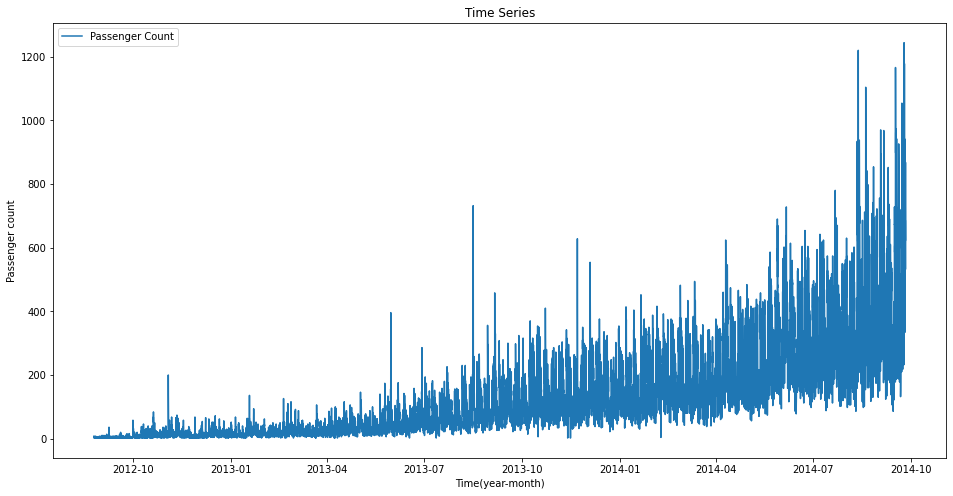

In [19]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x_axis.
df = train.drop('ID',1)   # Drop ID variable to get only rge Datetime on x-axis
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label = 'Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

## Exploratory Analysis

year
2012     11.282946
2013     78.306849
2014    283.017102
Name: Count, dtype: float64


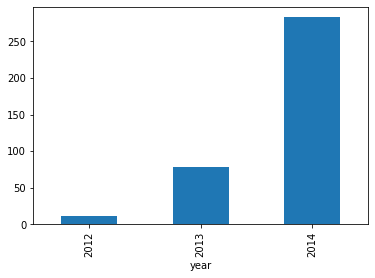

In [20]:
print(train.groupby('year')['Count'].mean()) #To support our hypothesis of the count increasing with years we want to graph the average count vs year
train.groupby('year')['Count'].mean().plot.bar()

month
1      92.817204
2     111.196429
3     103.791667
4     137.680556
5     155.055108
6     186.723611
7     209.071237
8     220.497585
9     181.958824
10     75.459677
11     78.413889
12     86.533602
Name: Count, dtype: float64


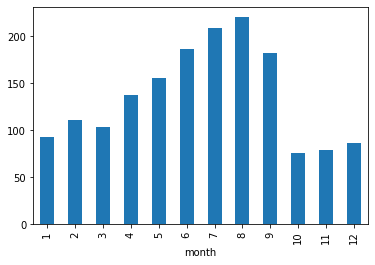

In [21]:
print(train.groupby('month')['Count'].mean()) #To support our hypothesis of the count increasing with months we want to graph the average count vs month
train.groupby('month')['Count'].mean().plot.bar()

year  month
2012  8          2.952381
      9          4.444444
      10        10.986559
      11        15.827778
      12        15.680108
2013  1         18.430108
      2         22.190476
      3         23.588710
      4         34.405556
      5         45.612903
      6         57.333333
      7         74.787634
      8        100.137097
      9        120.744444
      10       139.932796
      11       141.000000
      12       157.387097
2014  1        167.204301
      2        200.202381
      3        183.994624
      4        240.955556
      5        264.497312
      6        316.113889
      7        343.354839
      8        389.981183
      9        468.433333
Name: Count, dtype: float64


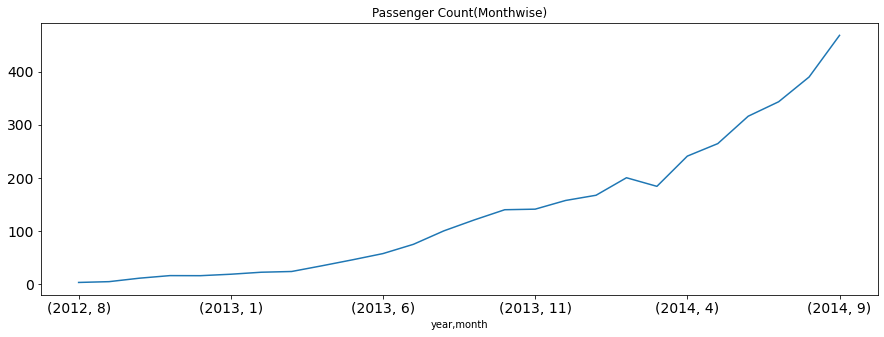

In [22]:
print(train.groupby(['year','month'])['Count'].mean())
train.groupby(['year','month'])['Count'].mean().plot(figsize = (15,5), title= 'Passenger Count(Monthwise)', fontsize = 14)

day
1     129.256667
2     133.830000
3     135.906667
4     142.310000
5     149.976667
6     135.200000
7     130.216667
8     128.960000
9     139.873333
10    148.243333
11    151.950000
12    141.470000
13    135.356667
14    127.956667
15    130.103333
16    147.320000
17    142.363333
18    142.346667
19    146.853333
20    141.690000
21    148.650000
22    152.186667
23    150.556667
24    153.983333
25    141.618590
26    132.620000
27    125.113333
28    130.513333
29    126.065217
30    129.684783
31    130.105556
Name: Count, dtype: float64


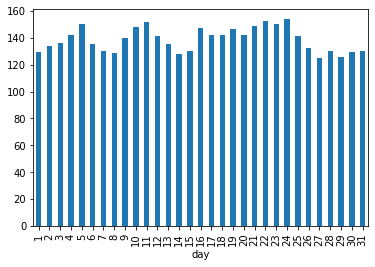

In [23]:
print(train.groupby('day')['Count'].mean())
train.groupby('day')['Count'].mean().plot.bar()

Hour
0     147.695538
1     117.868766
2      99.753281
3      82.422572
4      69.375328
5      62.102362
6      66.776903
7      77.443570
8      89.181102
9     115.241470
10    163.572178
11    181.341207
12    183.262467
13    162.081365
14    173.304462
15    171.115486
16    166.748031
17    170.632546
18    174.832021
19    185.514436
20    178.272966
21    166.398950
22    167.002625
23    163.055118
Name: Count, dtype: float64


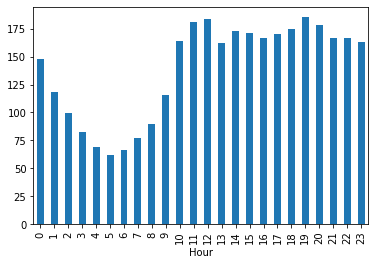

In [24]:
print(train.groupby('Hour')['Count'].mean())
train.groupby('Hour')['Count'].mean().plot.bar()

weekend
0    157.268536
1     93.266055
Name: Count, dtype: float64


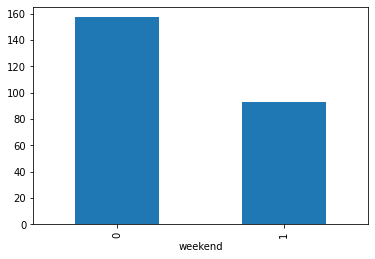

In [25]:
print(train.groupby('weekend')['Count'].mean())
train.groupby('weekend')['Count'].mean().plot.bar()

day of week
0    157.842508
1    164.750765
2    163.234709
3    155.676606
4    144.722994
5     96.059633
6     90.472477
Name: Count, dtype: float64


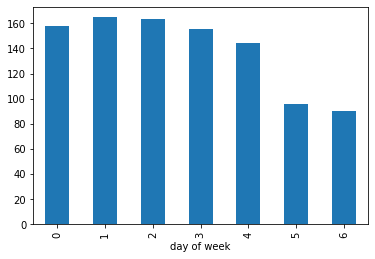

In [26]:
print(train.groupby('day of week')['Count'].mean())
train.groupby('day of week')['Count'].mean().plot.bar()

In [27]:
train = train.drop('ID',1)
train.Timestamp = pd.to_datetime(train.Datetime, format= '%d-%m-%Y %H:%M')
train.index = train.Timestamp
#Hourly time series
hourly = train.resample('H').mean()
#Converting to daily mean
daily = train.resample('D').mean()
#Converting to weekly mean
weekly = train.resample('W').mean()
#Converting to monthly mean
monthly = train.resample('M').mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


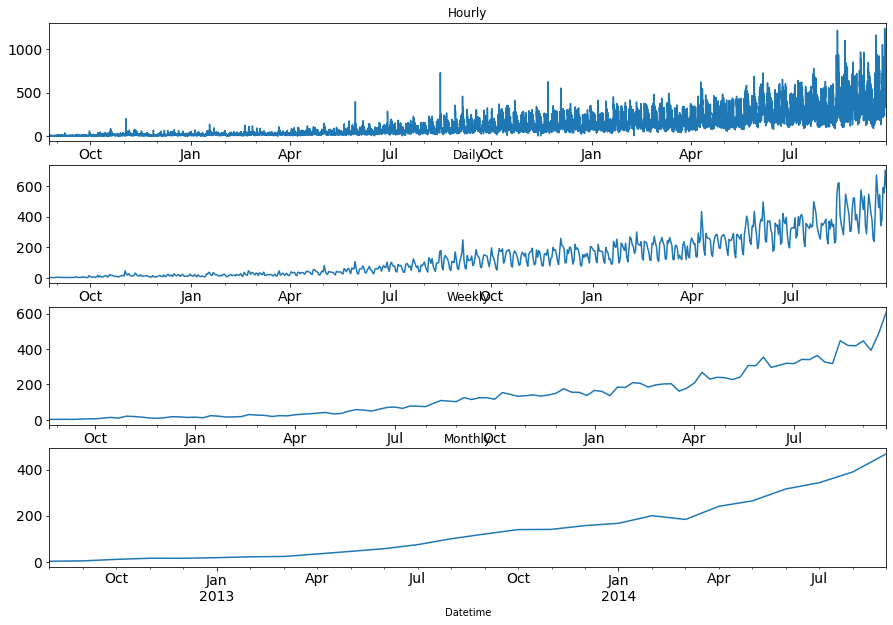

In [28]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,10),title='Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,10),title='Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,10),title='Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,10),title='Monthly', fontsize=14, ax=axs[3])
plt.show()

In [29]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp

#Converting the test set to daily mean
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.Timestamp

#Converting to daily mean
train = train.resample('D').mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


## Splitting the data into training and validation part

In [30]:
Train = train.loc['2012-08-25':'2014-06-24']
valid = train.loc['2014-06-25':'2014-09-25']

In [31]:
print(Train)

                 Count    year  month   day  Hour  day of week  weekend
Datetime                                                               
2012-08-25    3.166667  2012.0    8.0  25.0  11.5          5.0      1.0
2012-08-26    3.666667  2012.0    8.0  26.0  11.5          6.0      1.0
2012-08-27    2.583333  2012.0    8.0  27.0  11.5          0.0      0.0
2012-08-28    2.416667  2012.0    8.0  28.0  11.5          1.0      0.0
2012-08-29    2.500000  2012.0    8.0  29.0  11.5          2.0      0.0
...                ...     ...    ...   ...   ...          ...      ...
2014-06-20  379.916667  2014.0    6.0  20.0  11.5          4.0      0.0
2014-06-21  220.083333  2014.0    6.0  21.0  11.5          5.0      1.0
2014-06-22  230.833333  2014.0    6.0  22.0  11.5          6.0      1.0
2014-06-23  419.416667  2014.0    6.0  23.0  11.5          0.0      0.0
2014-06-24  372.166667  2014.0    6.0  24.0  11.5          1.0      0.0

[669 rows x 7 columns]


In [32]:
print(valid)

                 Count    year  month   day  Hour  day of week  weekend
Datetime                                                               
2014-06-25  353.666667  2014.0    6.0  25.0  11.5          2.0      0.0
2014-06-26  395.250000  2014.0    6.0  26.0  11.5          3.0      0.0
2014-06-27  282.333333  2014.0    6.0  27.0  11.5          4.0      0.0
2014-06-28  218.250000  2014.0    6.0  28.0  11.5          5.0      1.0
2014-06-29  196.250000  2014.0    6.0  29.0  11.5          6.0      1.0
...                ...     ...    ...   ...   ...          ...      ...
2014-09-21  379.250000  2014.0    9.0  21.0  11.5          6.0      1.0
2014-09-22  588.166667  2014.0    9.0  22.0  11.5          0.0      0.0
2014-09-23  554.333333  2014.0    9.0  23.0  11.5          1.0      0.0
2014-09-24  702.333333  2014.0    9.0  24.0  11.5          2.0      0.0
2014-09-25  589.666667  2014.0    9.0  25.0  11.5          3.0      0.0

[93 rows x 7 columns]


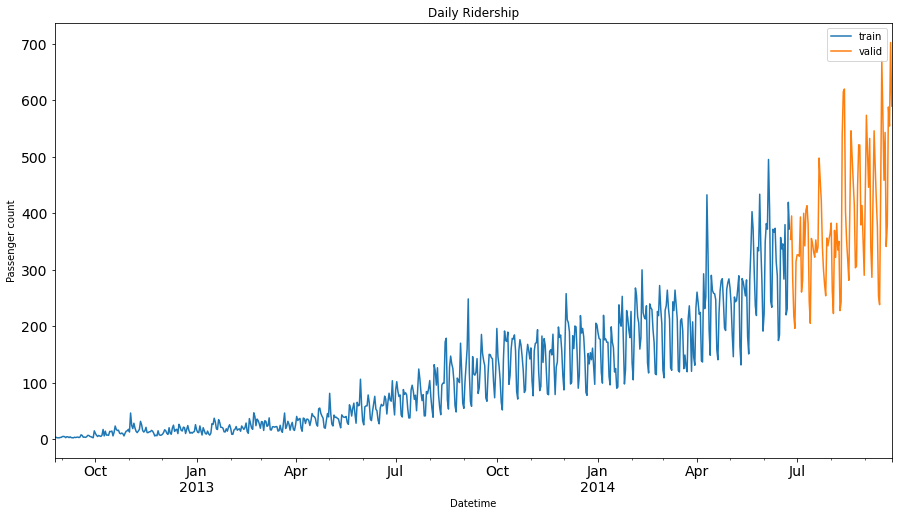

In [33]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()

## Predicting the count values for the valid set to check accuracy

### Naive Approach

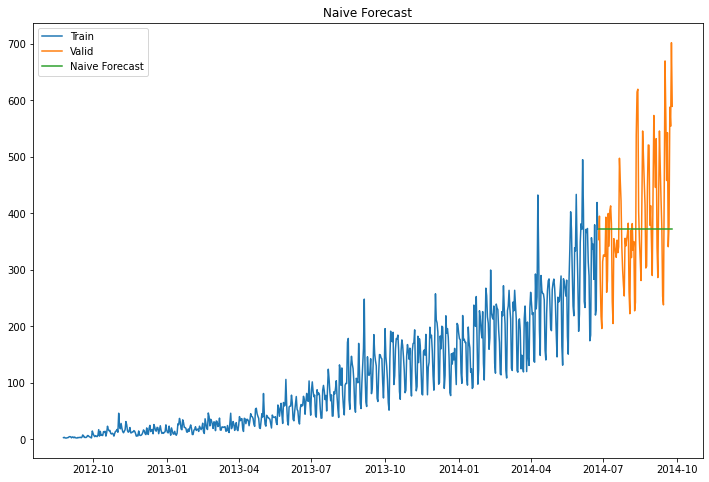

In [34]:
dd= np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = dd[-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index,valid['Count'], label='Valid')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(valid.Count, y_hat.naive))
print(rms)

111.79050467496724


### Moving Average

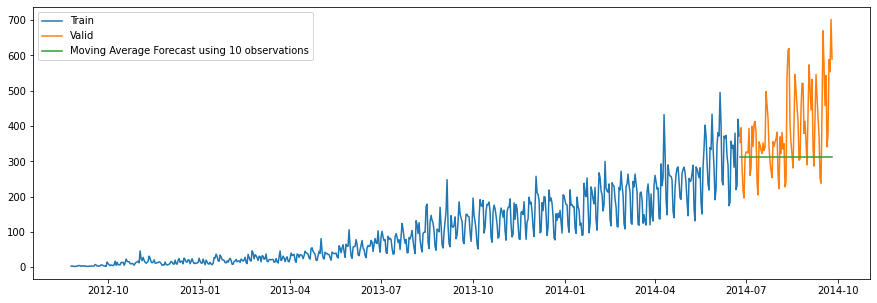

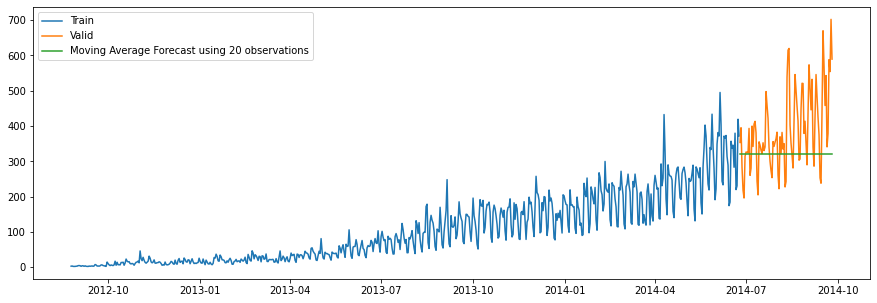

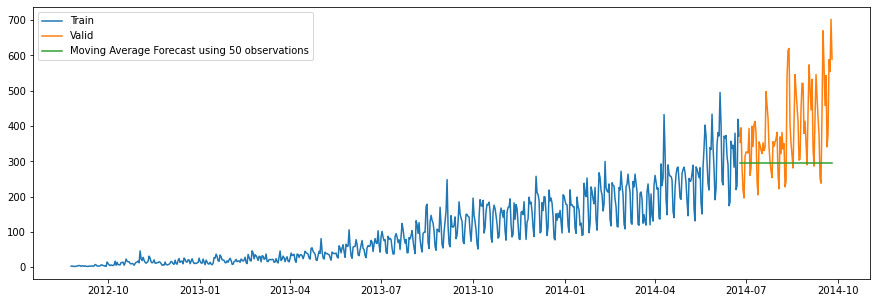

In [36]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [37]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)

144.19175679986802


### Simple Exponential Smoothing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


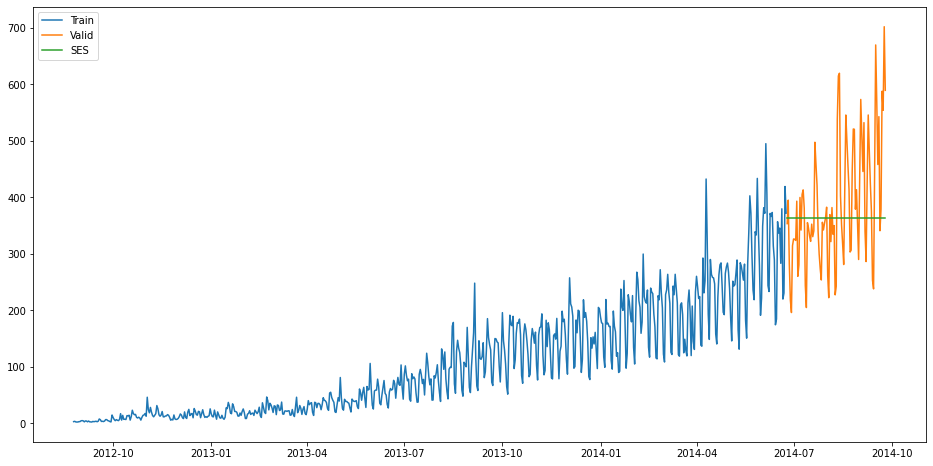

In [38]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_hat_avg = valid.copy() 
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False) 
y_hat_avg['SES'] = fit2.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

### Holt’s Linear Trend Model

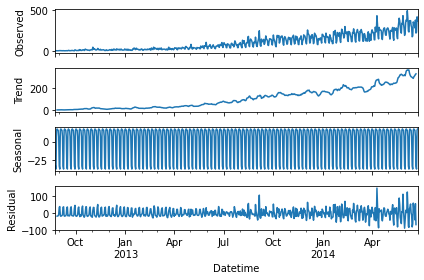

In [39]:
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(Train.Count).plot() 
result = sm.tsa.stattools.adfuller(train.Count) 
plt.show()

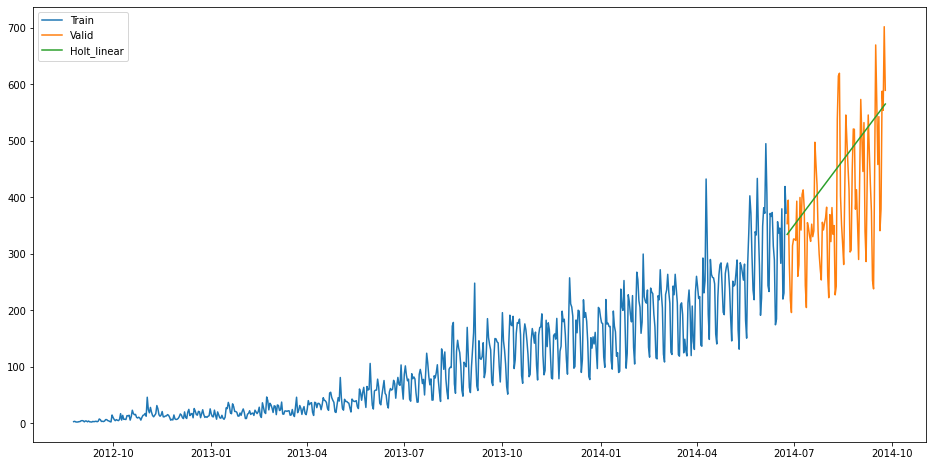

In [40]:
y_hat_avg = valid.copy() 
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()